In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import tensorflow as sns
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model,load_model
from keras.layers import Input,Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=14,8

RANDOM_SEED=42
LABELS=["Normal","Fraud"]

# Loading the data

In [4]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploraation

In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().values.any()

False

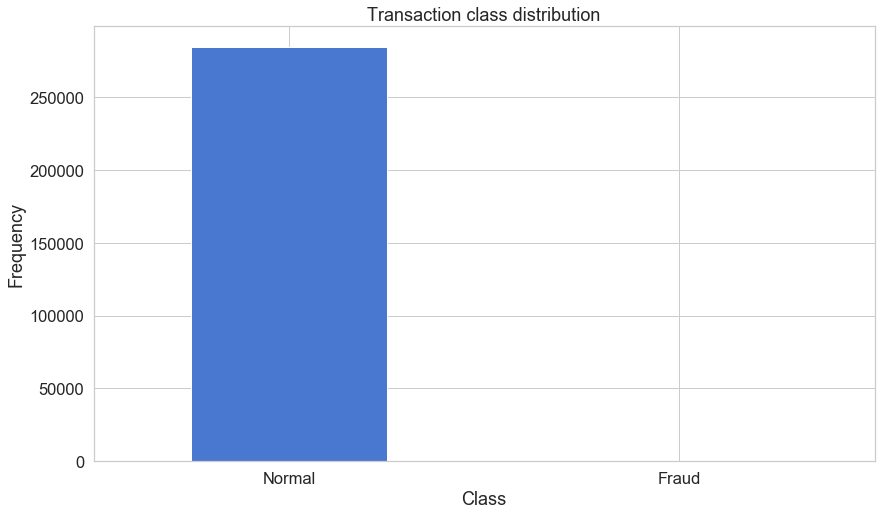

In [7]:
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
frauds=df[df.Class==1]
normal=df[df.Class==0]

In [9]:
frauds.shape

(492, 31)

In [10]:
normal.shape

(284315, 31)

In [11]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

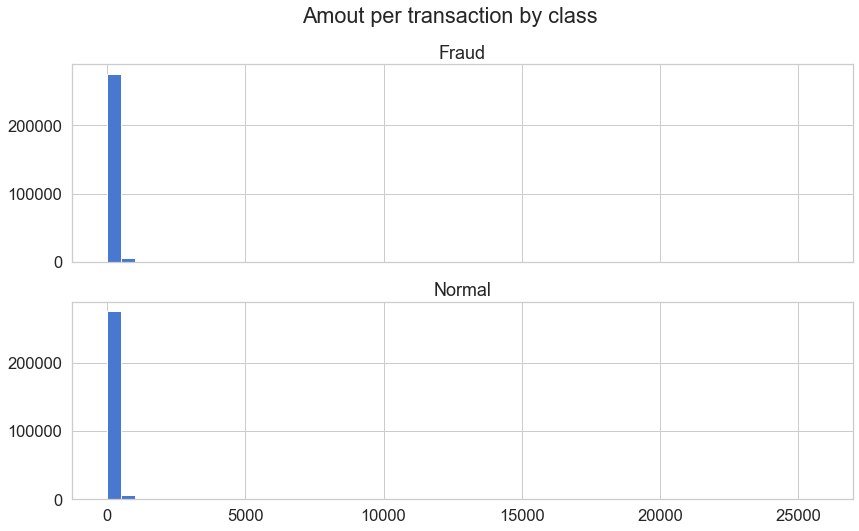

In [17]:
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amout per transaction by class')

bins=50

ax1.hist(normal.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlable('Amount')
plt.ylable('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show()


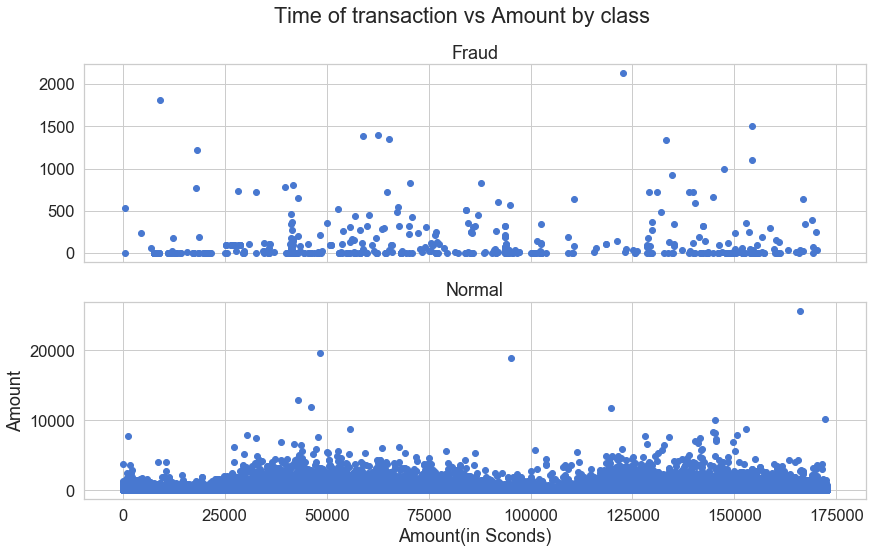

In [18]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time,frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Amount(in Sconds)')
plt.ylabel('Amount')
plt.show()

# Autoencoders

In [19]:
#Preparing the data 
from sklearn.preprocessing import StandardScaler
data=df.drop(['Time'],axis=1)
data['Amount']=StandardScaler().fit_transfrom(data['Amount'].values.reshape(-1,1))

AttributeError: 'StandardScaler' object has no attribute 'fit_transfrom'

In [ ]:
X_train ,X_test=train_test_split(data,test_size=0.2,random_state=Random_SEED)
X_train=X_train[X_train.Class == 0]
X_train=X_train.drop(['Class'],axis=1)

y_test=X_test['Class']
X_test=X_test.drop(['Class'],axis=1)

X_train =X_train.values
X_test=X_test.values


In [ ]:
X_train.shape

In [ ]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim,activation="tanh",activity_regularizer=regularizers.l1(10e-5=